In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import nltk
import re
import string
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [2]:
df=pd.read_csv("/content/Amazon_Reviews_Oneplus_10R.csv")
df.head()

,Unnamed: 0,Rating,Title,Review,Review_Date
0,0,1.0,"Disappointed with Oneplus, but more so with Am...",I have been Oneplus user now for last 7 years ...,11 May 2022
1,1,1.0,The worst One Plus phone ever,The worst phone from One Plus. Not recommended...,10 May 2022
2,2,5.0,Good Budget Flagship,Nice PhonePros+Flat Display+Nice chipset+Batte...,10 May 2022
3,3,1.0,ONEPLUS HAS LOST ITS ORIGINALITY,One of the worst phone of OnePlus. It's more o...,10 May 2022
4,4,1.0,Packing was blade cut by FE or related staff b...,The media could not be loaded.,11 May 2022


In [3]:
df1=df.copy()
df2=df.copy()
df3=df.head()

In [4]:
df1["char_count"]=df["Review"].str.len()
df1[["Review","char_count"]].head()

,Review,char_count
0,I have been Oneplus user now for last 7 years ...,2945.0
1,The worst phone from One Plus. Not recommended...,250.0
2,Nice PhonePros+Flat Display+Nice chipset+Batte...,111.0
3,One of the worst phone of OnePlus. It's more o...,1316.0
4,The media could not be loaded.,30.0


In [5]:
df2["word_count"]=df["Review"].apply(lambda x:len(str(x).split(" ")))
df2[["Review","word_count"]].head()

,Review,word_count
0,I have been Oneplus user now for last 7 years ...,532
1,The worst phone from One Plus. Not recommended...,47
2,Nice PhonePros+Flat Display+Nice chipset+Batte...,9
3,One of the worst phone of OnePlus. It's more o...,225
4,The media could not be loaded.,6


In [6]:
from nltk.corpus import stopwords
stop=stopwords.words("english")
df3["stopwords"]=df3["Review"].apply(lambda x:len([x for x in x.split() if x in stop]))
df3[["Review","stopwords"]]

,Review,stopwords
0,I have been Oneplus user now for last 7 years ...,208
1,The worst phone from One Plus. Not recommended...,18
2,Nice PhonePros+Flat Display+Nice chipset+Batte...,1
3,One of the worst phone of OnePlus. It's more o...,102
4,The media could not be loaded.,2


In [7]:
df = df.drop(columns=['Unnamed: 0','Rating','Title',"Review_Date"])

In [8]:
#Text Preprocessing
#PreProcessing
df['Final_review'] = df['Review'].str.replace(r'@\w+', '')

# Display the modified DataFrame
df.head()

,Review,Final_review
0,I have been Oneplus user now for last 7 years ...,I have been Oneplus user now for last 7 years ...
1,The worst phone from One Plus. Not recommended...,The worst phone from One Plus. Not recommended...
2,Nice PhonePros+Flat Display+Nice chipset+Batte...,Nice PhonePros+Flat Display+Nice chipset+Batte...
3,One of the worst phone of OnePlus. It's more o...,One of the worst phone of OnePlus. It's more o...
4,The media could not be loaded.,The media could not be loaded.


In [9]:
#Removing reviews with empty text
df = df[df['Final_review']!='']
df.head(5)

,Review,Final_review
0,I have been Oneplus user now for last 7 years ...,I have been Oneplus user now for last 7 years ...
1,The worst phone from One Plus. Not recommended...,The worst phone from One Plus. Not recommended...
2,Nice PhonePros+Flat Display+Nice chipset+Batte...,Nice PhonePros+Flat Display+Nice chipset+Batte...
3,One of the worst phone of OnePlus. It's more o...,One of the worst phone of OnePlus. It's more o...
4,The media could not be loaded.,The media could not be loaded.


In [10]:
cleaned_reviews = []

for index, row in df.iterrows():
    # Check if the entry is a string
    if isinstance(row.Final_review, str):
        # Filtering out words that contain links
        words_without_links = [word for word in row.Final_review.split() if 'http' not in word]
        cleaned_reviews.append(' '.join(words_without_links))
    else:
        # Handle non-string entries (e.g., if the entry is a float)
        cleaned_reviews.append('')

# Create a new column with cleaned reviews
df['Final_review'] = cleaned_reviews

df.head()

,Review,Final_review
0,I have been Oneplus user now for last 7 years ...,I have been Oneplus user now for last 7 years ...
1,The worst phone from One Plus. Not recommended...,The worst phone from One Plus. Not recommended...
2,Nice PhonePros+Flat Display+Nice chipset+Batte...,Nice PhonePros+Flat Display+Nice chipset+Batte...
3,One of the worst phone of OnePlus. It's more o...,One of the worst phone of OnePlus. It's more o...
4,The media could not be loaded.,The media could not be loaded.


In [11]:
# Converting text to lowercase, removing text in square brackets,removing links, punctuation and  words containing numbers
def clean_text(text):

    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df['Final_review']=df['Final_review'].apply(lambda x: clean_text(x))
df.head()

,Review,Final_review
0,I have been Oneplus user now for last 7 years ...,i have been oneplus user now for last years a...
1,The worst phone from One Plus. Not recommended...,the worst phone from one plus not recommended ...
2,Nice PhonePros+Flat Display+Nice chipset+Batte...,nice phoneprosflat displaynice chipsetbattery ...
3,One of the worst phone of OnePlus. It's more o...,one of the worst phone of oneplus its more of ...
4,The media could not be loaded.,the media could not be loaded


In [12]:
#Removing Emojis
def remove_emoji(text):
    emoji_pattern = re.compile("[" u"\U0001F600-\U0001F64F" u"\U0001F300-\U0001F5FF"u"\U0001F680-\U0001F6FF" u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['Final_review']=df['Final_review'].apply(lambda x: remove_emoji(x))
df.head(10)

,Review,Final_review
0,I have been Oneplus user now for last 7 years ...,i have been oneplus user now for last years a...
1,The worst phone from One Plus. Not recommended...,the worst phone from one plus not recommended ...
2,Nice PhonePros+Flat Display+Nice chipset+Batte...,nice phoneprosflat displaynice chipsetbattery ...
3,One of the worst phone of OnePlus. It's more o...,one of the worst phone of oneplus its more of ...
4,The media could not be loaded.,the media could not be loaded
5,I used the one plus 5 for five years and have ...,i used the one plus for five years and have b...
6,Pros:-awesome display-good battery backup-take...,prosawesome displaygood battery backuptakes m...
7,The media could not be loaded.,the media could not be loaded
8,Worst camera quality - Adding additional makeu...,worst camera quality adding additional makeup...
9,I am a OnePlus fan & a very long time OnePlus ...,i am a oneplus fan a very long time oneplus p...


In [13]:
df['tokenized_review'] = df['Final_review'].apply(lambda x: nltk.word_tokenize(x))
df.head(10)

,Review,Final_review,tokenized_review
0,I have been Oneplus user now for last 7 years ...,i have been oneplus user now for last years a...,"[i, have, been, oneplus, user, now, for, last,..."
1,The worst phone from One Plus. Not recommended...,the worst phone from one plus not recommended ...,"[the, worst, phone, from, one, plus, not, reco..."
2,Nice PhonePros+Flat Display+Nice chipset+Batte...,nice phoneprosflat displaynice chipsetbattery ...,"[nice, phoneprosflat, displaynice, chipsetbatt..."
3,One of the worst phone of OnePlus. It's more o...,one of the worst phone of oneplus its more of ...,"[one, of, the, worst, phone, of, oneplus, its,..."
4,The media could not be loaded.,the media could not be loaded,"[the, media, could, not, be, loaded]"
5,I used the one plus 5 for five years and have ...,i used the one plus for five years and have b...,"[i, used, the, one, plus, for, five, years, an..."
6,Pros:-awesome display-good battery backup-take...,prosawesome displaygood battery backuptakes m...,"[prosawesome, displaygood, battery, backuptake..."
7,The media could not be loaded.,the media could not be loaded,"[the, media, could, not, be, loaded]"
8,Worst camera quality - Adding additional makeu...,worst camera quality adding additional makeup...,"[worst, camera, quality, adding, additional, m..."
9,I am a OnePlus fan & a very long time OnePlus ...,i am a oneplus fan a very long time oneplus p...,"[i, am, a, oneplus, fan, a, very, long, time, ..."


In [14]:
df = df.drop(columns=['Final_review'])

In [15]:
#Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw = ['am','using','phone','may']
my_stop_words.extend(sw)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in df.iterrows():

    # filerting out all the stopwords
     words_without_stopwords = [word for word in row.tokenized_review if word.lower() not in my_stop_words and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
     cleaned_tweets.append(' '.join(words_without_stopwords))

df['Final_review'] = cleaned_tweets
df.head()

,Review,tokenized_review,Final_review
0,I have been Oneplus user now for last 7 years ...,"[i, have, been, oneplus, user, now, for, last,...",oneplus user last years couldnt look beyond on...
1,The worst phone from One Plus. Not recommended...,"[the, worst, phone, from, one, plus, not, reco...",worst one plus recommended cheap look design s...
2,Nice PhonePros+Flat Display+Nice chipset+Batte...,"[nice, phoneprosflat, displaynice, chipsetbatt...",nice phoneprosflat displaynice chipsetbattery ...
3,One of the worst phone of OnePlus. It's more o...,"[one, of, the, worst, phone, of, oneplus, its,...",one worst oneplus oppo stuffthe body made chea...
4,The media could not be loaded.,"[the, media, could, not, be, loaded]",media could loaded


In [16]:
#Lemmatization
tokenized_review = df['Final_review'].apply(lambda x: x.split())
word_lemmatizer = WordNetLemmatizer()
tokenized_review = tokenized_review.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])

In [17]:
df['Final_review'] = tokenized_review
df['Final_review'] = df['Final_review'].apply(lambda x: ' '.join(x))
df.head(10)

,Review,tokenized_review,Final_review
0,I have been Oneplus user now for last 7 years ...,"[i, have, been, oneplus, user, now, for, last,...",oneplus user last year couldnt look beyond one...
1,The worst phone from One Plus. Not recommended...,"[the, worst, phone, from, one, plus, not, reco...",worst one plus recommended cheap look design s...
2,Nice PhonePros+Flat Display+Nice chipset+Batte...,"[nice, phoneprosflat, displaynice, chipsetbatt...",nice phoneprosflat displaynice chipsetbattery ...
3,One of the worst phone of OnePlus. It's more o...,"[one, of, the, worst, phone, of, oneplus, its,...",one worst oneplus oppo stuffthe body made chea...
4,The media could not be loaded.,"[the, media, could, not, be, loaded]",medium could loaded
5,I used the one plus 5 for five years and have ...,"[i, used, the, one, plus, for, five, years, an...",used one plus five year bought one week back p...
6,Pros:-awesome display-good battery backup-take...,"[prosawesome, displaygood, battery, backuptake...",prosawesome displaygood battery backuptakes mi...
7,The media could not be loaded.,"[the, media, could, not, be, loaded]",medium could loaded
8,Worst camera quality - Adding additional makeu...,"[worst, camera, quality, adding, additional, m...",worst camera quality adding additional makeup ...
9,I am a OnePlus fan & a very long time OnePlus ...,"[i, am, a, oneplus, fan, a, very, long, time, ...",oneplus fan long time oneplus phone user didnt...


In [18]:
#Feature Extraction
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

sentiments_using_SIA = df.Final_review.apply(lambda x: fetch_sentiment_using_SIA(x))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Final_review
pos,374
neg,82


In [19]:
df4=pd.DataFrame()
df4['Reviews'] = df.Final_review
sid = SentimentIntensityAnalyzer()
df4['scores'] = df4['Reviews'].apply(lambda x: sid.polarity_scores(x))
df4['compound']  = df4['scores'].apply(lambda x: x['compound'])
df4 = df4.drop(columns=['scores'])
df4.head()


,Reviews,compound
0,oneplus user last year couldnt look beyond one...,0.9392
1,worst one plus recommended cheap look design s...,-0.1779
2,nice phoneprosflat displaynice chipsetbattery ...,0.4215
3,one worst oneplus oppo stuffthe body made chea...,-0.0415
4,medium could loaded,0.0000


In [20]:
df4['sentiment'] = df4['compound'].apply(lambda c: 'Positive' if c >= 0.05 else 'Negative' if c <= -0.05 else 'Neutral')
df4.head()

,Reviews,compound,sentiment
0,oneplus user last year couldnt look beyond one...,0.9392,Positive
1,worst one plus recommended cheap look design s...,-0.1779,Negative
2,nice phoneprosflat displaynice chipsetbattery ...,0.4215,Positive
3,one worst oneplus oppo stuffthe body made chea...,-0.0415,Neutral
4,medium could loaded,0.0000,Neutral


In [21]:
df4['sentiment'].value_counts()

Positive    289
Negative     84
Neutral      83
Name: sentiment, dtype: int64

(array([289.,   0.,   0.,   0.,   0.,  84.,   0.,   0.,   0.,  83.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

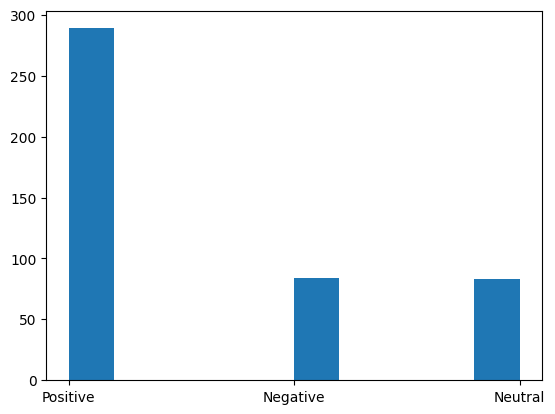

In [22]:
plt.hist(df4['sentiment'])

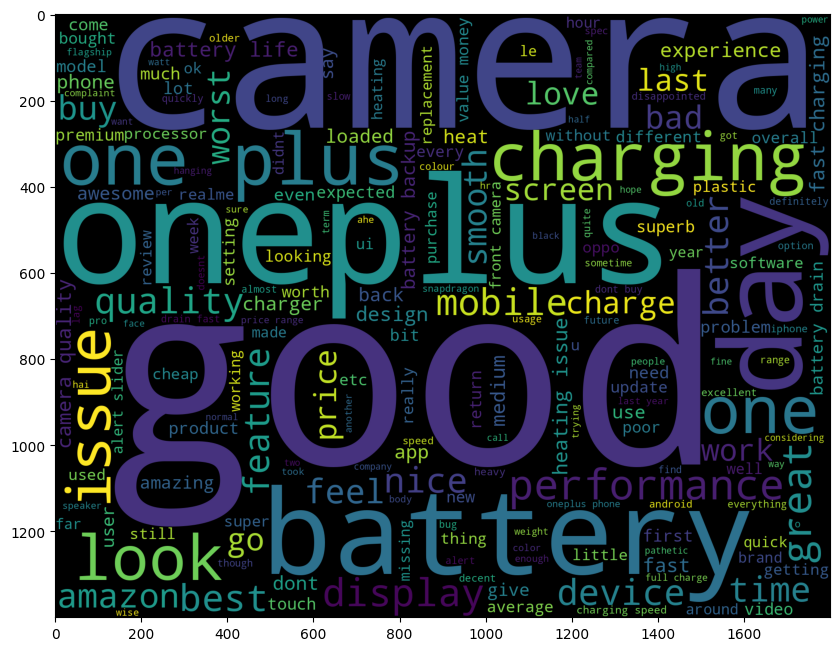

In [23]:
allWords_ = ' '.join([review for review in df['Final_review']])
f, axes = plt.subplots(figsize=(10,8))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)